## Introduction

In [1]:
# Using a Python list (array) and adding/removing elements 
s=[2,3,4]
s.append(5)
s.insert(0,1)
print (s)
print ("s before:",s)
print ("pop(): ", s.pop())
print ("s after:", s)
print ("pop(): ", s.pop())
print ("s after:", s)
print ("pop(0): ", s.pop(0))
print ("s finally:", s)

[1, 2, 3, 4, 5]
s before: [1, 2, 3, 4, 5]
pop():  5
s after: [1, 2, 3, 4]
pop():  4
s after: [1, 2, 3]
pop(0):  1
s finally: [2, 3]


In [3]:
class MyStack:
    """ simple stack implemented using a Python list (array)"""
    def __init__(self):
        self.data = []
        
    def push(self,x):
        self.data.append(x)
        
    def pop(self):
        return self.data.pop()
    
    def is_empty(self):
        return len(self.data) == 0
    
s = MyStack()
s.push(3)
s.push(4)
s.push(5)
print (s.pop(), s.pop(), s.pop())
print (s.is_empty())

5 4 3
True


In [4]:
def stack_fill_and_empty(n):
    S = MyStack()
    for item in range(n):
        S.push(item)
        
    while n>0:
        S.pop()
        n -= 1

sizes = [10000, 20000, 40000, 80000, 160000, 320000]
for n in sizes:
    %timeit stack_fill_and_empty(n)

47.3 ms ± 604 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
94.8 ms ± 9.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
186 ms ± 6.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
364 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
763 ms ± 26.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.57 s ± 63.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
import numpy as np
def fit_poly(x,y,k):
    n = len(x)
    x = np.array(x)
    y = np.array(y)
    A = np.zeros((n,k+1))
    for i in range(k+1):
        A[:,i] = np.array(x)**i
    c = np.linalg.lstsq(A,y)[0]
    misfit = np.linalg.norm(np.dot(A,c)-y)    
    return c, misfit

In [7]:
x = sizes
y = [10.2, 20.5, 42.4, 84.6, 173, 346]
c, misfit = fit_poly(x, y, 1) #coefficients for 2nd degree and 3rd degree terms approx. zero when tried with k=2 & 3
print ("coefficients:",c)
print ("misfit:", misfit)

coefficients: [ -1.13084577e+00   1.08489694e-03]
misfit: 1.29666347842


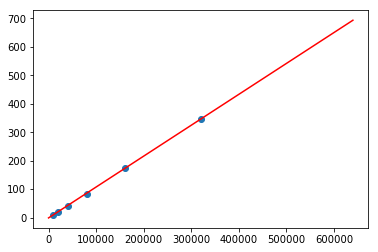

In [8]:
xx = np.linspace(0,2*x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

In [9]:
# alternatively fitting f(x)=c0 x^c1:
c, misfit = fit_poly(np.log(x),np.log(y),1)
print ("coefficients:",c)
print ("misfit:", misfit)
print ("best fitting polynomial:",np.exp(c[0]),"x^",c[1])

coefficients: [-7.05802554  1.01852791]
misfit: 0.0177058613011
best fitting polynomial: 0.000860475392788 x^ 1.01852791344


We can conclude that pushing n elements to the stack and removing them again takes O(n) time. This means each operation is O(1) (on average!) 

## 1. Test queue operations using a Python list
We first use a Python list (array) as an (inefficient) queue. Our test consists of queueing n elements and then dequeueing all of them. Complete the code below, time for different n, create a fit of the right degree and conclude what the cost of queueing and dequeueing one element is.

In [10]:
def fill_and_empty_queue_using_list(n):
    L = []
    for item in range(n):
        L.append(item)
        
    while n > 0:
        L.pop(0)
        n -= 1
    
sizes = [10000,20000,40000,80000,160000]
for n in sizes:
    %timeit fill_and_empty_queue_using_list(n)

143 ms ± 5.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
527 ms ± 35.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.01 s ± 99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.74 s ± 83.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
33.1 s ± 658 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


coefficients: [  3.39411765e+01  -1.99985452e-03   2.85705250e-07]
misfit: 24.9119334372


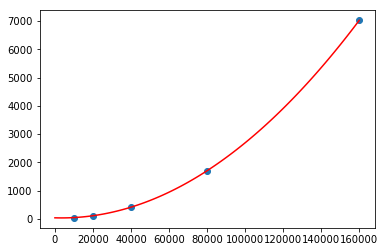

In [14]:
x = sizes
y = [31.3,112,429,1690,7030] 
c, misfit = fit_poly(x,y,2) #k=3 yields coefficient for 3rd order term approx zero
print ("coefficients:",c )
print ("misfit:", misfit)

xx = np.linspace(0,x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

In [15]:
c, misfit = fit_poly(np.log(x),np.log(y),2)
print ("coefficients:",c)
print ("misfit:", misfit)
print ("best fitting polynomial:",np.exp(c[0]),"x^",c[1])

coefficients: [-9.15180332  0.91647542  0.04894542]
misfit: 0.00903057040054
best fitting polynomial: 0.000106028426613 x^ 0.916475417991


fill_and_empty_queue_using_list(n) takes O(n^2). To conclude:
1. enqueue one element (append to a list) takes O(1)
2. dequeuing one element (remove from the left) takes O(n)
3. while removing the last element in a list takes O(1).

## 2. Using a deque
First determine the correct functions to call to enqueue (add to the right) and dequeue (pop from the left) an element from a deque. Try it out in the next block (it should print 1, then 2, then 3).
Then complete dequeue_fill_and_empty() with those commands, benchmark it, fit a curve, and conclude.

In [16]:
from collections import deque
Q = deque()
Q.append(1) # enqueue 1
Q.append(2) # enqueue 2
Q.append(3) # enqueue 3
print (Q.popleft()) # dequeue and print
print (Q.popleft()) # dequeue and print
print (Q.popleft()) # dequeue and print

1
2
3


In [17]:
def dequeue_fill_and_empty(n):
    L = deque()
    for item in range(n):
        L.append(item) # enqueue
        
    while n > 0:
        L.popleft() # now dequeue
        n -= 1

sizes = [10000,20000,40000,80000,160000]
for n in sizes:
    %timeit dequeue_fill_and_empty(n)

17.1 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
35.6 ms ± 457 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
69 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
148 ms ± 7.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
306 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


coefficients: [ -9.67500000e-01   4.02153226e-04]
misfit: 1.839491953


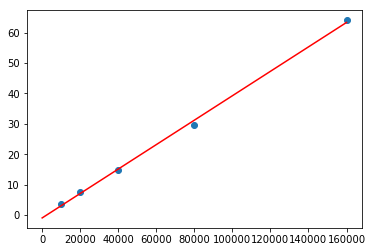

In [19]:
x = sizes
y = [3.71,7.42,14.9,29.7,64.1] # fill
c, misfit = fit_poly(x,y,1) #k=2 gives the coefficient for 2nd order term approx zero
print ("coefficients:",c)
print ("misfit:", misfit)

xx = np.linspace(0,x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

Filling and emptying a queue (n elements) based on Python's deque takes: O(n). Therefore, a single enqueue() or dequeue() takes: O(1). Read up on wikipedia on "deque" and state the cost for the operations for:
1. add element on left: O(1)
2. add element on right: O(1)
3. remove element on left: O(1)
4. remove element on right: O(1)

Is that what you see? Yes the graph shows a linear trend, when n is increased computational time increases linearly as the cost of all insertion and removal operations from the end or beginning are constant for deque (O(1)) i.e. O(n) for n operations.

## 3: Now implement a deque using a doubly-linked list
Complete the implementation, make sure the tests work, and finally time the operations.

In [20]:
class MyDeque:
    """ a double-ended queue implemented using a linked list"""
 
    class ListItem:
        """ an item in a doubly-linked list"""
        def __init__(self, x, prev, next):
            self.item = x
            self.prev = prev
            self.next = next

    def __init__(self):
        self.head = None
        self.tail = None
        
    def push_right(self, x):
        if self.head == None:
            self.head = MyDeque.ListItem(x,None, None)
            self.tail = self.head
        else:
            n = MyDeque.ListItem(x, self.tail, None)
            self.tail.next = n
            self.tail = n
            
    def push_left(self, x):
        if self.head == None:
            self.head = MyDeque.ListItem(x,None, None)
            self.tail = self.head
        else:
            n = MyDeque.ListItem(x, None, self.head)
            self.head.prev = n
            self.head = n
            
   
    def pop_left(self):
        if self.head == None:
            return None
        item = self.head.item
        if self.head.next == None:
            self.head = None
            self.tail = None
        else:
            newhead = self.head.next
            newhead.prev = None
            self.head = newhead
        return item
    
    def pop_right(self):
        if self.head == None:
            return None
        item = self.tail.item 
        if self.head.next == None:
            self.head = None
            self.tail = None
        else:
            newtail = self.tail.prev
            newtail.next = None
            self.tail = newtail
        
        return item
    
    def print_it(self):
        it = self.head
        print ("[[ ", end="")
        while it != None:
            print (it.item, end=" ")
            it = it.next
        print ("]]")

Q = MyDeque()
Q.push_right(1)
Q.push_right(2)
Q.push_right(3)
Q.push_left(0)
Q.push_right(4)
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())
Q.print_it()
print ("pop_left:", Q.pop_left())
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())

[[ 0 1 2 3 4 ]]
pop_left: 0
pop_right: 4
[[ 1 2 3 ]]
pop_left: 1
[[ 2 3 ]]
pop_left: 2
pop_right: 3
[[ ]]
pop_left: None
pop_right: None


in label of node node22398053689216
in label of node node22398054816008
in label of node node22398053690840
in label of node node22398053688544


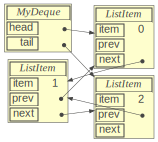

In [21]:
#!wget -O lolviz.py https://raw.githubusercontent.com/tjhei/lolviz/master/lolviz.py
import lolviz
Q = MyDeque()
Q.push_right(1)
Q.push_right(2)
Q.push_left(0)
lolviz.objviz(Q)

In [22]:
# some more tests:

Q = MyDeque()
Q.push_left(1)
Q.push_right(2)
assert(Q.head.item == 1)
assert(Q.tail.item == 2)
assert(Q.head.next == Q.tail)
assert(Q.head.prev == None)
assert(Q.tail.prev == Q.head)
assert(Q.pop_right()==2)
assert(Q.head.item == 1)
assert(Q.head == Q.tail)
assert(Q.head.prev == None)
assert(Q.head.next == None)
assert(Q.pop_right()==1)
assert(Q.head == None)
assert(Q.tail == None)

for n in range(5):
    Q.push_right(n)
Q.print_it()    
for n in range(5):
    assert(Q.pop_left()==n)
assert(Q.pop_left()==None) 

for n in range(5):
    Q.push_left(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_right()==n)
assert(Q.pop_right()==None)

for n in range(5):
    Q.push_right(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_right()==4-n)
    
for n in range(5):
    Q.push_left(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_left()==4-n)

print ("ok")

[[ 0 1 2 3 4 ]]
[[ 4 3 2 1 0 ]]
[[ 0 1 2 3 4 ]]
[[ 4 3 2 1 0 ]]
ok


In [23]:
def test_our_deque(n):
    Q = MyDeque()
    for idx in range(n):
        Q.push_right(n)
        Q.push_left(n)
        
    for idx in range(n):
        Q.pop_left()
        Q.pop_right()

sizes = [10000, 20000, 40000, 80000, 160000]
for n in sizes:
    %timeit test_our_deque(n)

279 ms ± 7.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
553 ms ± 22.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.18 s ± 54.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.37 s ± 71.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.82 s ± 91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


test_our_deque() takes: O(n). Therefore, all operations take O(1) as expected!